In [371]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [372]:
data = pd.read_csv('dataset_zadanie.csv')

### W skrócie praca będzie polegać na poniższych krokach:
1. Pobranie danych, obejrzenie ich, sprawdzenie sensowności, wartości pustych / zerowych - zastanowienie się nad ich istotnością, co z nimi zrobimy, bo są różne opcje. Dane kategoryczne trzeba w jakiś sposób zamienić na zrozumiałe dla komputera dane - tocategorical() może pomóc.
2. Niby tu powinna być wizualizacja, ale faktycznie wizualizacja wykonuje się razem z powyższym, bo nie jesteś w stanie obejrzeć wszystkich wierszy po kolei i zapamiętać ich sensu.
3. Standaryzacja / normalizacja danych
4. Podział na dane trenujące / testowe
5. Wybranie modelu - jesli jest klasyfikacja to mamy do wyboru różne opcje, które już Ci wysłałem.
6. Trenowanie modelu
7. Testowanie modelu -> wynik zadowalający kończymy pracę. Jeśli nie to prawdopodobnie powtarzamy cały proces od początku lub dodatkowo możemy popracować nad parametrami klasyfikatora (hiperparametrami).

In [373]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,122,90,51,220,49.7,0.325,31,1
1,1,163,72,0,0,39.0,1.222,33,1
2,1,151,60,0,0,26.1,0.179,22,0
3,0,125,96,0,0,22.5,0.262,21,0
4,1,81,72,18,40,26.6,0.283,24,0


In [374]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               749 non-null    int64  
 1   Glucose                   749 non-null    int64  
 2   BloodPressure             749 non-null    int64  
 3   SkinThickness             749 non-null    int64  
 4   Insulin                   749 non-null    int64  
 5   BMI                       749 non-null    float64
 6   DiabetesPedigreeFunction  749 non-null    float64
 7   Age                       749 non-null    int64  
 8   Outcome                   749 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.8 KB


In [402]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [400]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,748.0,3.814171,3.321096,0.000000,1.000000,3.000000,6.000000,14.000000
Glucose,749.0,122.069892,30.501301,44.000000,100.000000,118.000000,141.000000,199.000000
BloodPressure,749.0,72.485315,12.034187,24.000000,64.000000,72.485315,80.000000,122.000000
SkinThickness,749.0,29.061415,8.401933,7.000000,25.000000,29.000000,32.000000,63.000000
Insulin,749.0,4.825683,0.502601,2.639057,4.828314,4.836282,4.867534,6.740519
BMI,749.0,32.492924,6.842756,18.200000,27.600000,32.400000,36.600000,67.100000
DiabetesPedigreeFunction,749.0,-0.950957,0.643581,-2.551046,-1.406497,-0.967584,-0.463624,0.883768
Age,749.0,33.295060,11.780626,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,749.0,0.353805,0.478469,0.000000,0.000000,0.000000,1.000000,1.000000


Widać, że mamy wartości zerowe w dość ważnych parametrach. Trzeba coś z tym zrobić -> zamienię najpierw wartości zerowe na Nan.

In [376]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                34
SkinThickness               223
Insulin                     365
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Spójrzmy na wykresy pudełkowe, jak wygląda sprawa z wartościami odstającymi

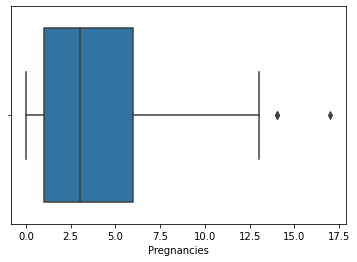

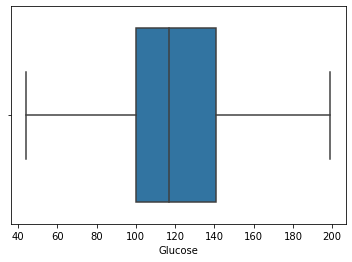

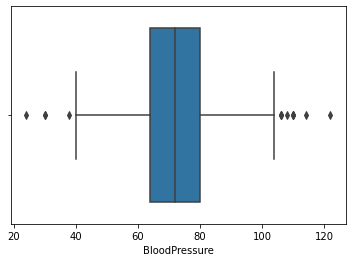

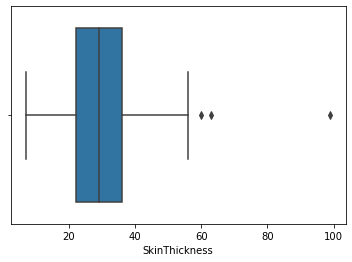

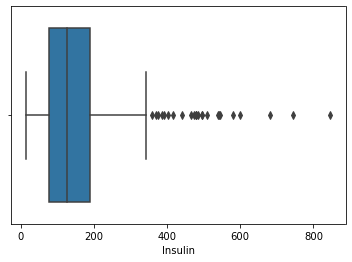

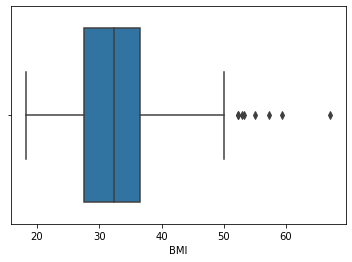

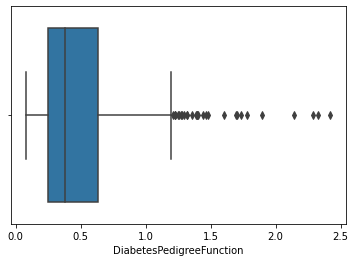

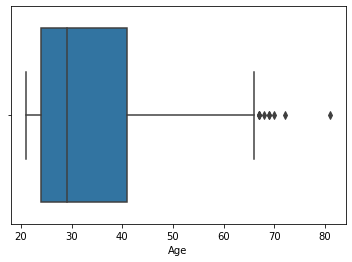

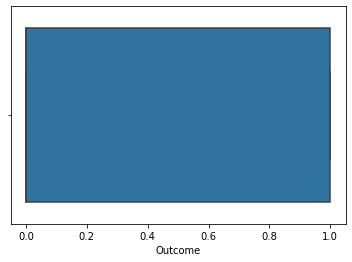

In [377]:
for c in data_copy.columns:
    plt.figure()
    sns.boxplot(x = c, data = data_copy)

In [380]:
#https://www.statystyka-zadania.pl/wykres-pudelkowy/

def cleanColumn_byOutliers(data, column, thr = 2):
    col_describe = data[column].describe()
    q1 = col_describe[4]
    q3 = col_describe[6]
    
    IQR = q3 - q1 #Interquartile Range
    top_limit = q3 + thr * IQR 
    bot_limit = q1 - thr * IQR
    
    #filters
    filter_clm_bottom = bot_limit < data[columns]
    filter_clm_top = data[columns] < top_limit
    
    filters = filter_clm_bottom & filter_clm_top
    
    data = data[filters]
    
    print("{} of dataset after column {}".format(data.shape, column))
    
    return data[column]

In [381]:
columns_to_remove = ["Pregnancies", "SkinThickness"]
for col in columns_to_remove:
    data_copy[col] = cleanColumn_byOutliers(data_copy, col)

(749, 9) of dataset after column Pregnancies
(749, 9) of dataset after column SkinThickness


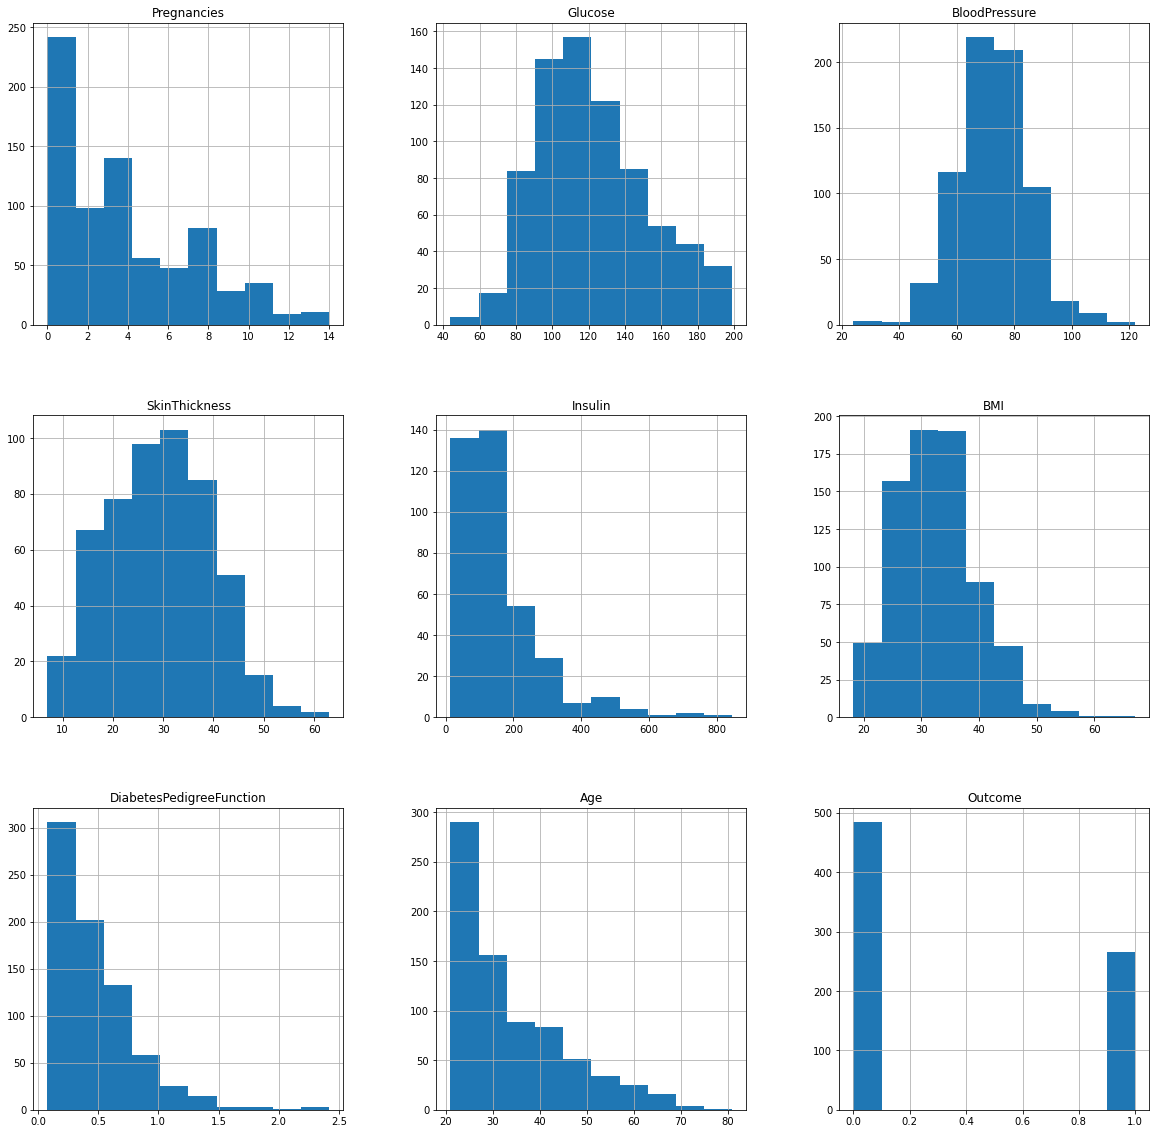

In [382]:
plots = data_copy.hist(figsize = (20,20))

In [403]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['Pregnancies'].fillna(data_copy['Pregnancies'].median(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

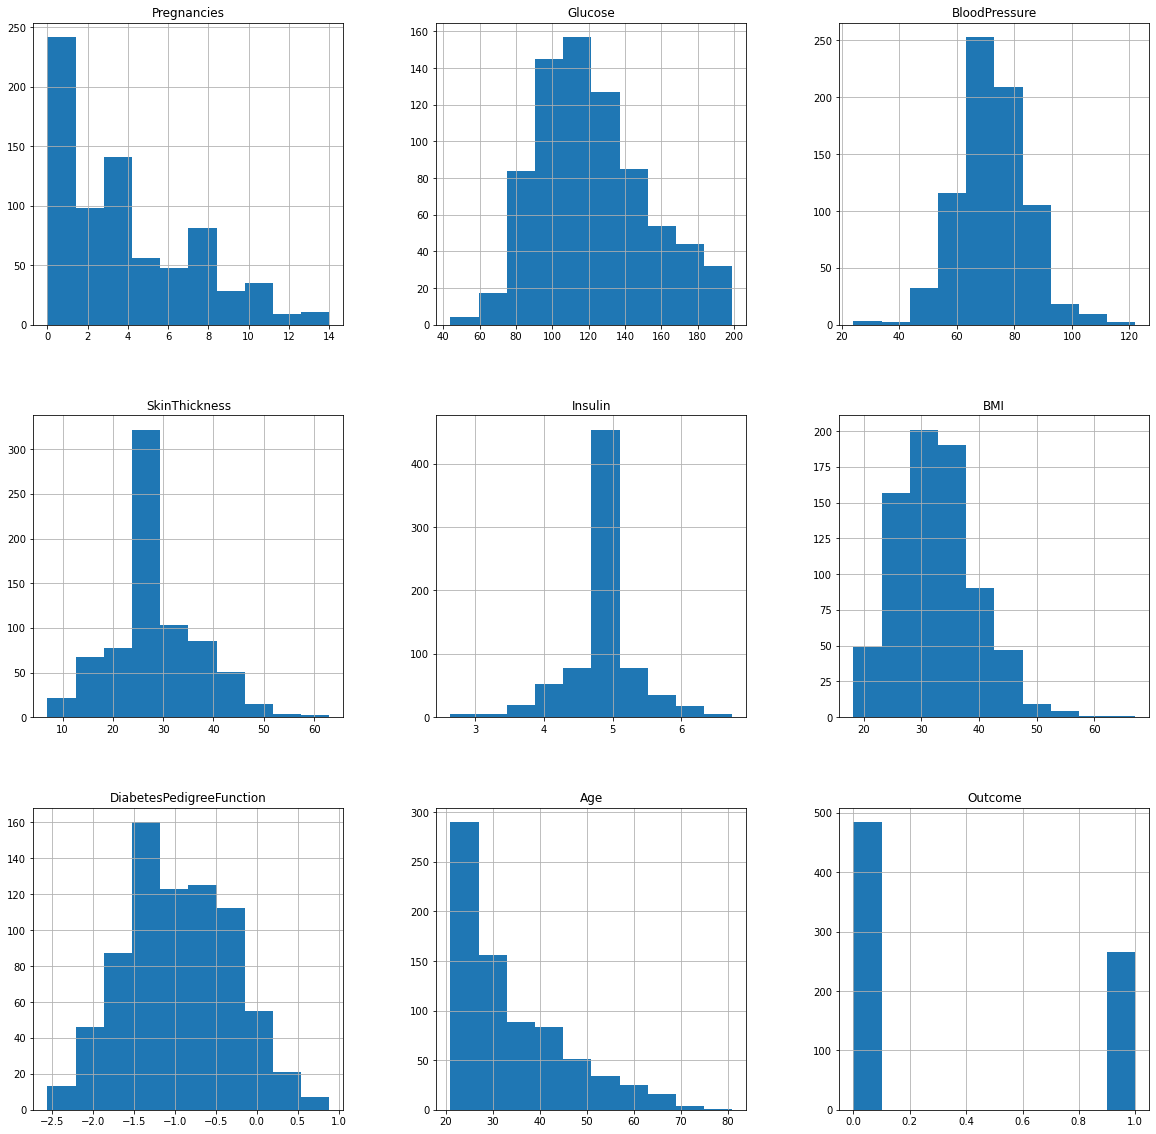

In [404]:
plots = data_copy.hist(figsize = (20,20))

In [405]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,749.0,3.813084,3.319009,0.000000,1.000000,3.000000,6.000000,14.000000
Glucose,749.0,122.069892,30.501301,44.000000,100.000000,118.000000,141.000000,199.000000
BloodPressure,749.0,72.485315,12.034187,24.000000,64.000000,72.485315,80.000000,122.000000
SkinThickness,749.0,29.061415,8.401933,7.000000,25.000000,29.000000,32.000000,63.000000
Insulin,749.0,4.825683,0.502601,2.639057,4.828314,4.836282,4.867534,6.740519
BMI,749.0,32.492924,6.842756,18.200000,27.600000,32.400000,36.600000,67.100000
DiabetesPedigreeFunction,749.0,-0.950957,0.643581,-2.551046,-1.406497,-0.967584,-0.463624,0.883768
Age,749.0,33.295060,11.780626,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,749.0,0.353805,0.478469,0.000000,0.000000,0.000000,1.000000,1.000000


In [406]:
print(data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [407]:
for col in data_copy.columns:
    print(col, round(data_copy[col].skew(),2))

Pregnancies 0.84
Glucose 0.53
BloodPressure 0.13
SkinThickness 0.22
Insulin -0.25
BMI 0.6
DiabetesPedigreeFunction 0.11
Age 1.13
Outcome 0.61


In [408]:
for col in data_copy.columns:
    if abs(data_copy[col].skew()) > 1.5:
        data_copy[col] = np.log(data_copy[col])

In [409]:
for col in data_copy.columns:
    print(col, round(data_copy[col].skew(),2))

Pregnancies 0.84
Glucose 0.53
BloodPressure 0.13
SkinThickness 0.22
Insulin -0.25
BMI 0.6
DiabetesPedigreeFunction 0.11
Age 1.13
Outcome 0.61


Zobaczmy jak wygląda rozkład klas wyjściowych

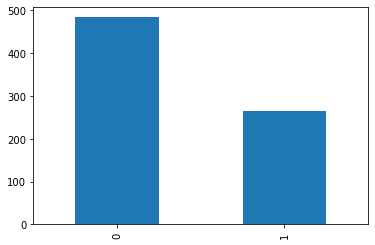

In [410]:
outcome_plot = data_copy["Outcome"].value_counts().plot(kind="bar")

Obczajmy sobie jak wyglądają zależności między zmiennymi, czy da się zauważyć jakąś łatwą relację
https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

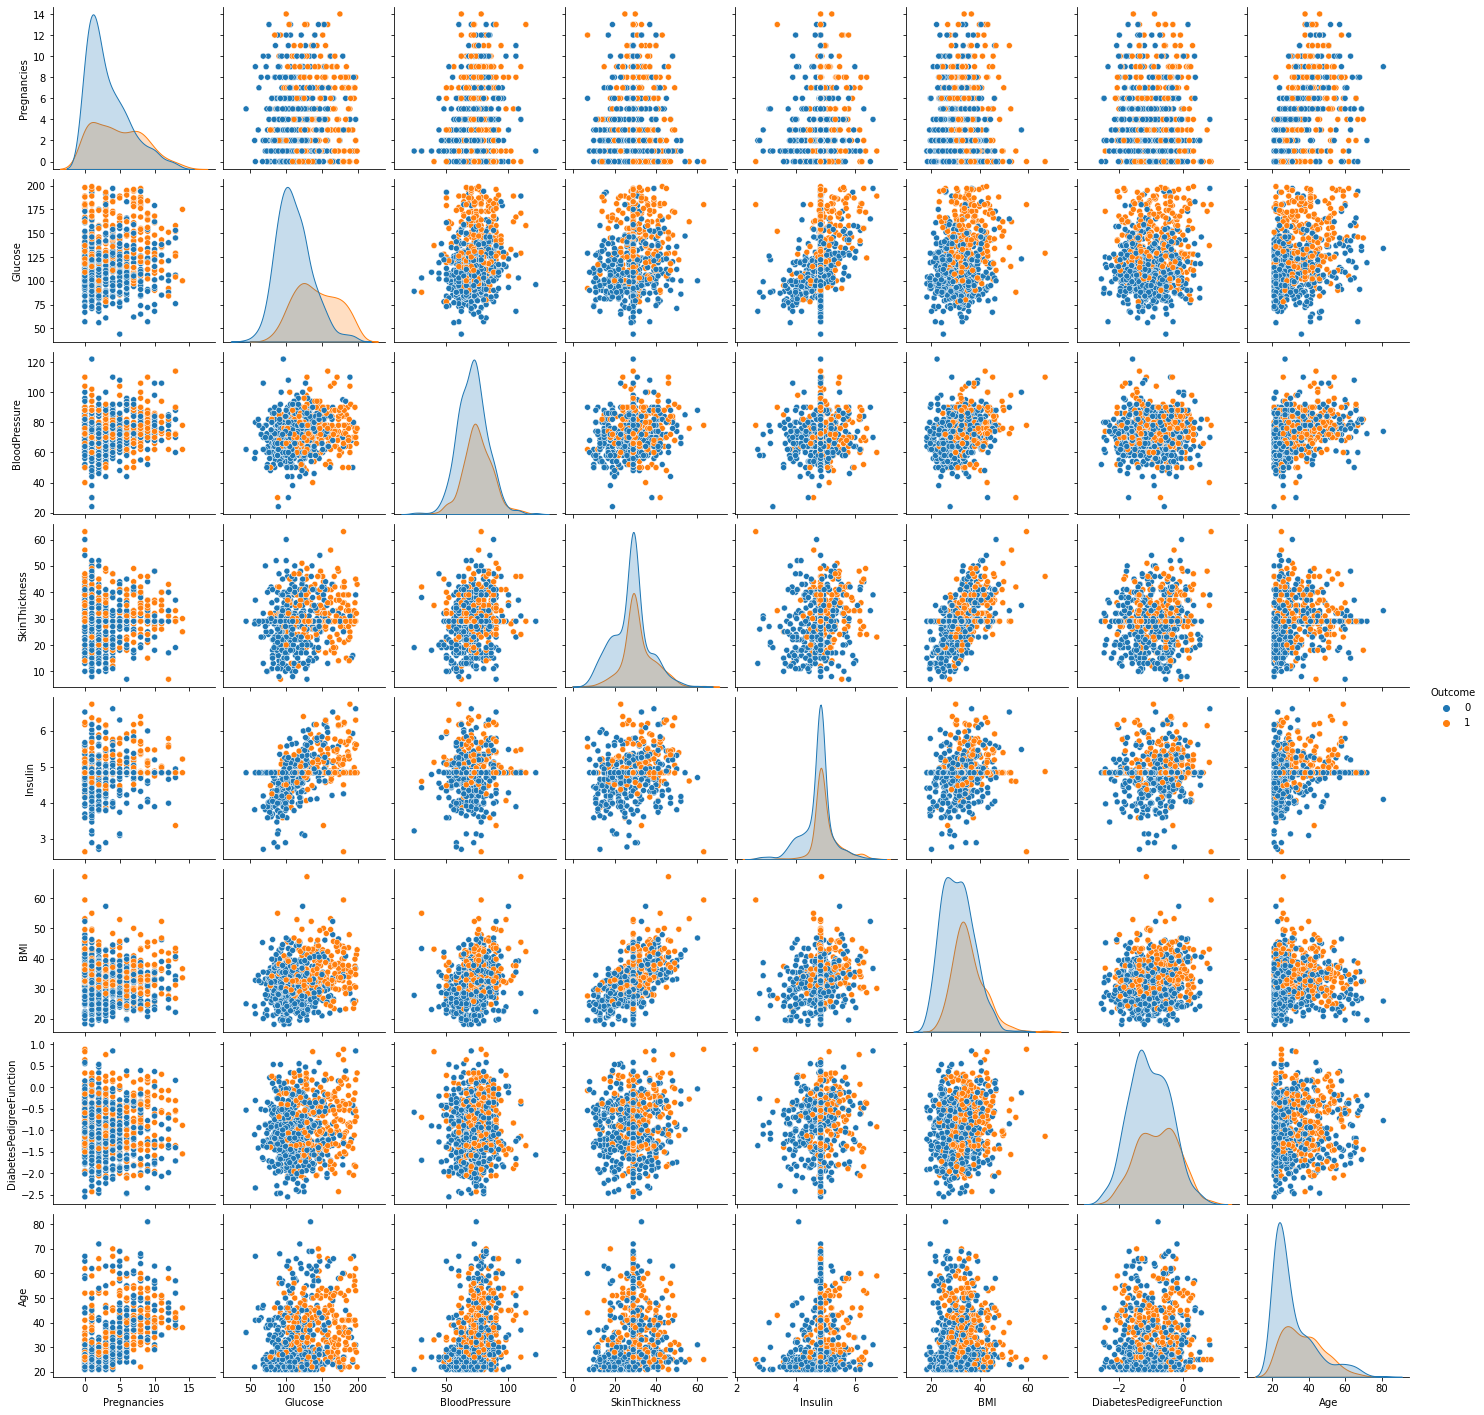

In [411]:
sns.pairplot(data_copy, hue = 'Outcome')

Korelacja Pearsona

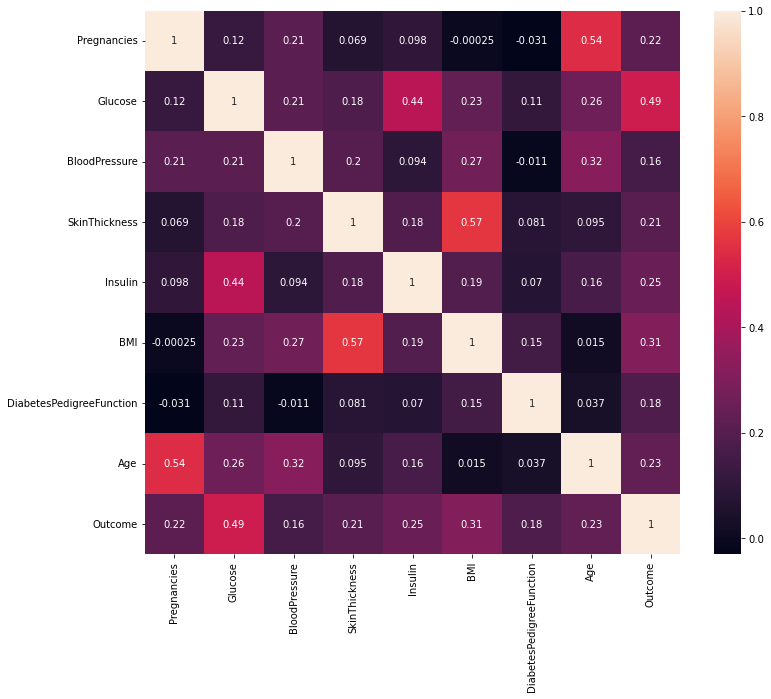

In [412]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(data_copy.corr(), annot=True)

In [413]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
columns_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = pd.DataFrame(Scaler.fit_transform(data_copy.drop(["Outcome"], axis = 1)), columns = columns_names)
y = data_copy["Outcome"]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.848134,-0.002293,1.456383,2.612880,1.130767,2.516322,-0.268946,-0.194947
1,-0.848134,1.342810,-0.040355,-0.007315,0.021103,0.951579,1.790320,-0.025063
2,-0.848134,0.949121,-1.038180,-0.007315,0.021103,-0.934886,-1.196317,-0.959423
3,-1.149630,0.096129,1.955296,-0.007315,0.021103,-1.461341,-0.603985,-1.044365
4,-0.848134,-1.347396,-0.040355,-1.317412,-2.263353,-0.861767,-0.484103,-0.789540


In [414]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [415]:
from sklearn.metrics import classification_report

predictions = logmodel.predict(x_test)
print(classification_report(y_test,predictions))
print(f"Accuracy: {round(accuracy_score(y_test, predictions)*100, 2)}%")

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       139
           1       0.80      0.59      0.68        86

    accuracy                           0.79       225
   macro avg       0.79      0.75      0.76       225
weighted avg       0.79      0.79      0.78       225

Accuracy: 78.67%


Text(0.5, 15.0, 'Predicted label')

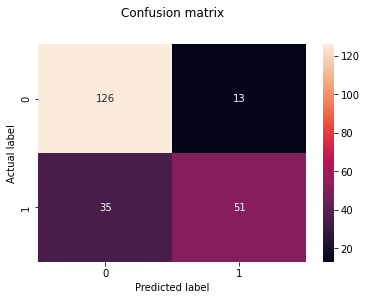

In [416]:
from sklearn.metrics import confusion_matrix, accuracy_score

cnf_matrix = confusion_matrix(y_test,predictions)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Przydatne funkcje z rozkładem normalnym?

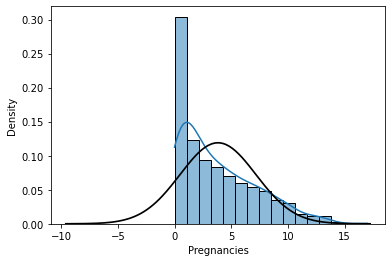

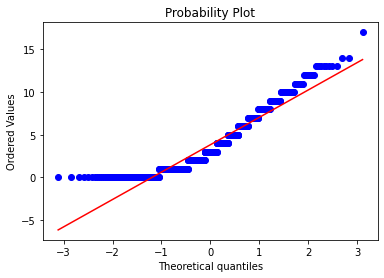

In [80]:
from scipy.stats import norm
from scipy import stats

def normal(mean, std, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = stats.norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=1.7)

sns.histplot(x=data['Pregnancies'], stat="density", kde=True)
normal(data['Pregnancies'].mean(), data['Pregnancies'].std())

fig = plt.figure()
res = stats.probplot(data['Pregnancies'], plot=plt)

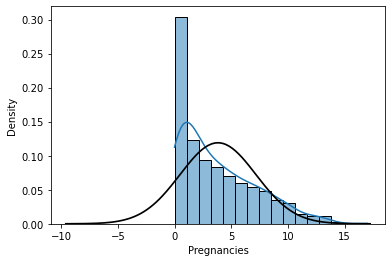

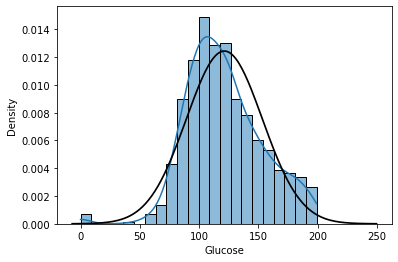

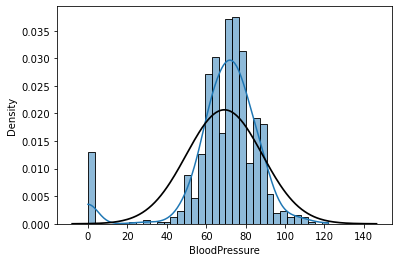

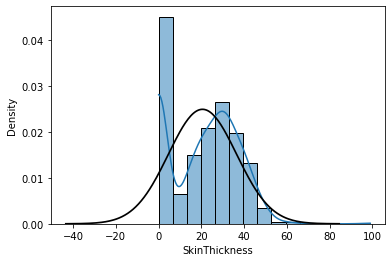

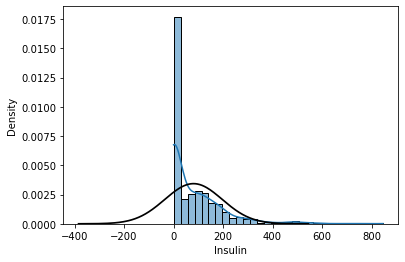

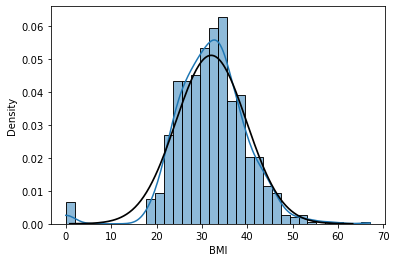

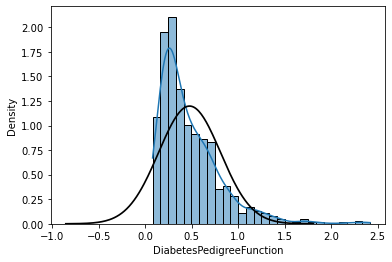

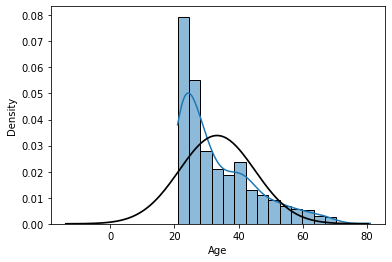

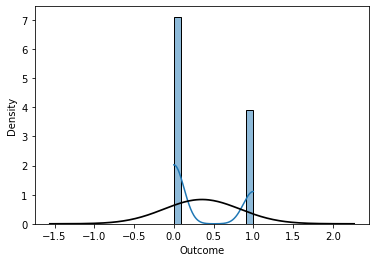

In [81]:
for col in data.columns:
    plt.figure()
    sns.histplot(x=data[col], stat="density", kde=True)
    normal(data[col].mean(), data[col].std())

# Wniosek:
Mamy tutaj trochę dziwne dane, poziom insuliny, ciśnienie krwi nie wiadomo w jakich jednostkach.